<h1 style="font-size:3rem;color:orange;">House Pricing Prediction Using Regression Model</h1>

###

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###

### Data Analysis

##### Here, we import the dataset and have a brief overview about the dataset

In [2]:
houseData = pd.read_csv('House Pricing.csv')

In [3]:
# checking out the overall view of the dataset 
houseData

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


##### From the overview above, there are a total of 545 records and 13 columns. In our dataset, 'price' will be the target variable and the other 12 columns will be the features

In [4]:
cols_to_check = houseData.columns[2:]

# Checking the unique values for each feature except for feature 'area'
for col in cols_to_check:
    print(f'Unique values in {col}: {houseData[col].unique()}')

Unique values in bedrooms: [4 3 5 2 6 1]
Unique values in bathrooms: [2 4 1 3]
Unique values in stories: [3 4 2 1]
Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['no' 'yes']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['yes' 'no']
Unique values in parking: [2 3 0 1]
Unique values in prefarea: ['yes' 'no']
Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [5]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##### Now, we will perform exploratory data analysis to have some insight about the dataset

<AxesSubplot:>

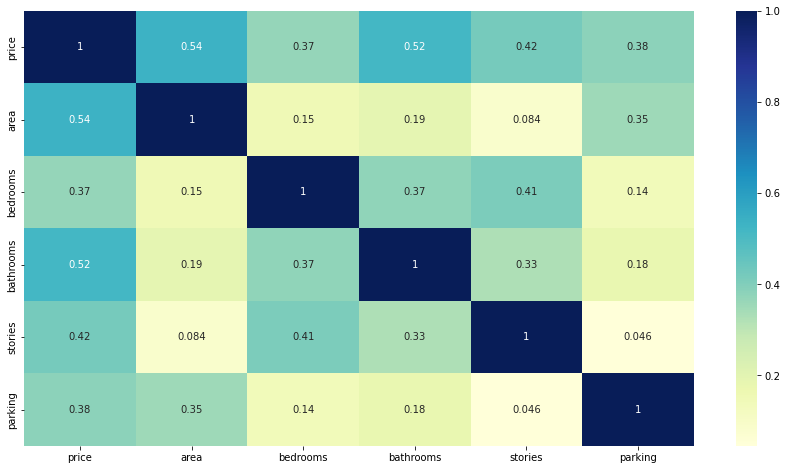

In [6]:
# visualize numeric features
plt.figure(figsize=(15,8))
sns.heatmap(houseData.corr(), annot=True, cmap="YlGnBu")

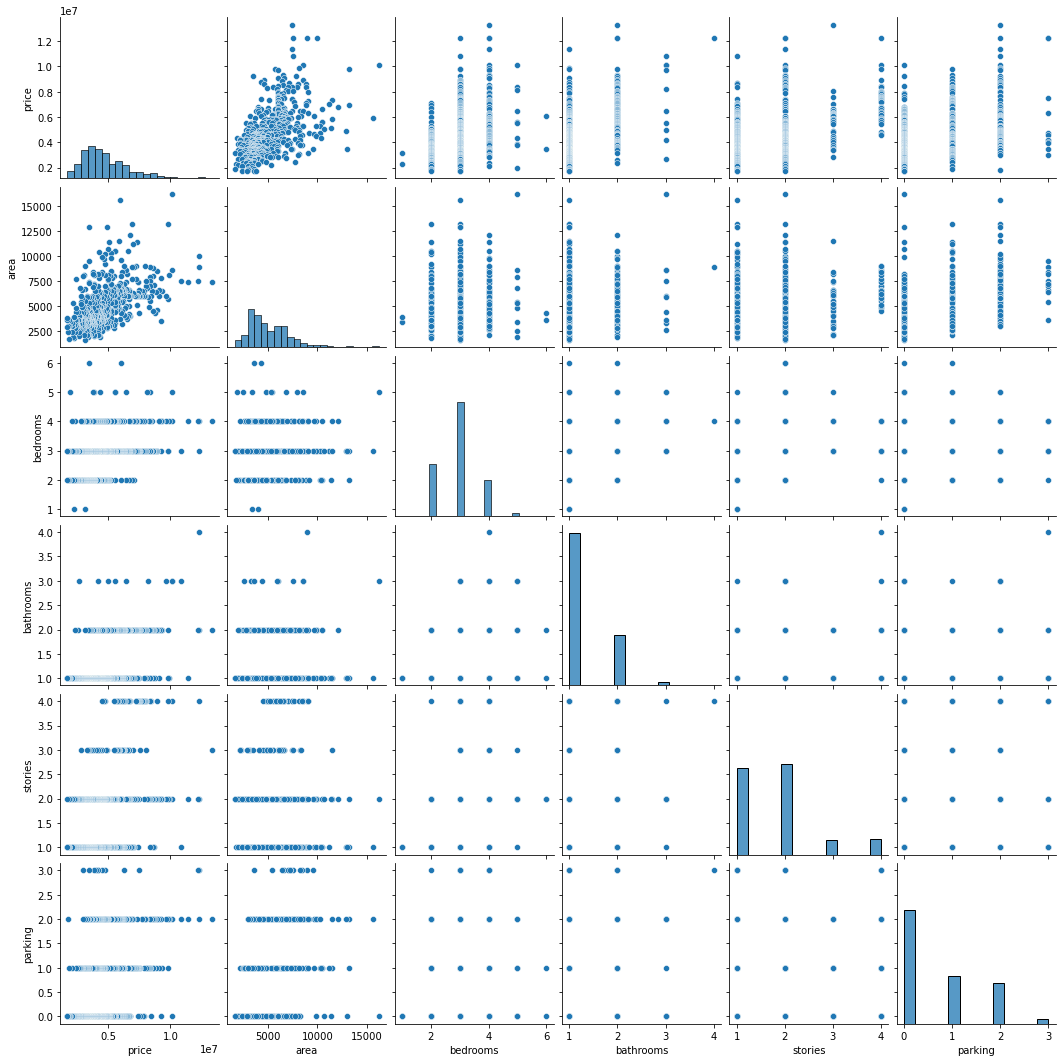

In [7]:
sns.pairplot(houseData)

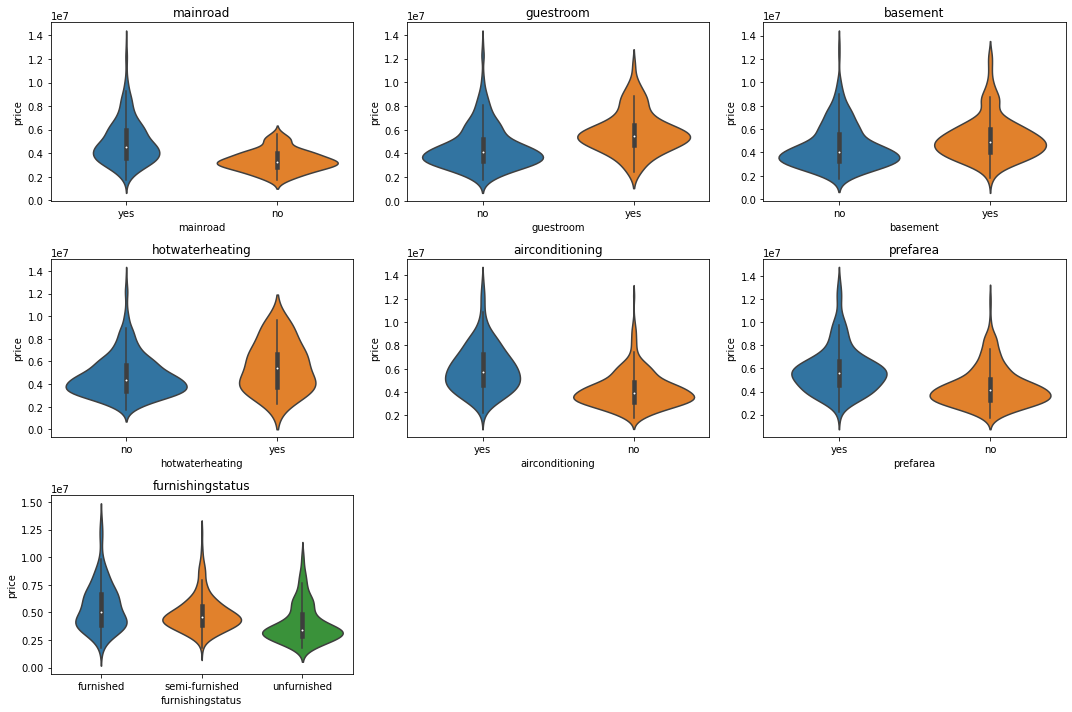

In [8]:
# visualize categorical features

cat_feats = houseData.iloc[:, 5:13].select_dtypes(include=['object']).columns.tolist()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, feat in enumerate(cat_feats):
    row = i // 3
    col = i % 3
    sns.violinplot(x=feat, y='price', data=houseData, ax=axs[row, col])
    axs[row, col].set_title(feat)

for i in range(len(cat_feats), len(axs.flat)):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()




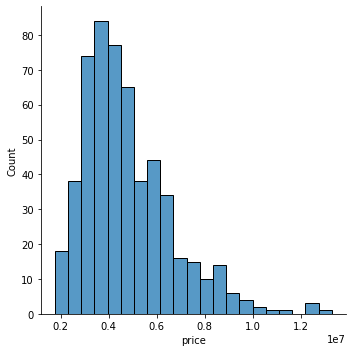

In [9]:
# visualize the pattern of the housing price
sns.displot(houseData['price'])

###

## Data Pre-Processing

##### Here, we will check the dataset if there's any dirty data and clean them (missing values and misspellings)

In [10]:
houseData.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
# checking if there's any missing values
houseData.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

##### There aren't anything features with missing values. Then, we will check if there is any misspellings. However, from the unique values identified above, we can confirm that the features with object data type do not have any misspellings as the categories of the features are certain. 

##### After that, we will now start handling categorical features by transforming them to numerical form.

In [12]:
cols_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
mapping = {'yes': 1, 'no': 0}
houseData[cols_to_convert] = houseData[cols_to_convert].replace(mapping)
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
# for feature with more than two unique values
houseData = houseData.join(pd.get_dummies(houseData.furnishingstatus)).drop(['furnishingstatus'], axis=1)


In [14]:
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


<AxesSubplot:>

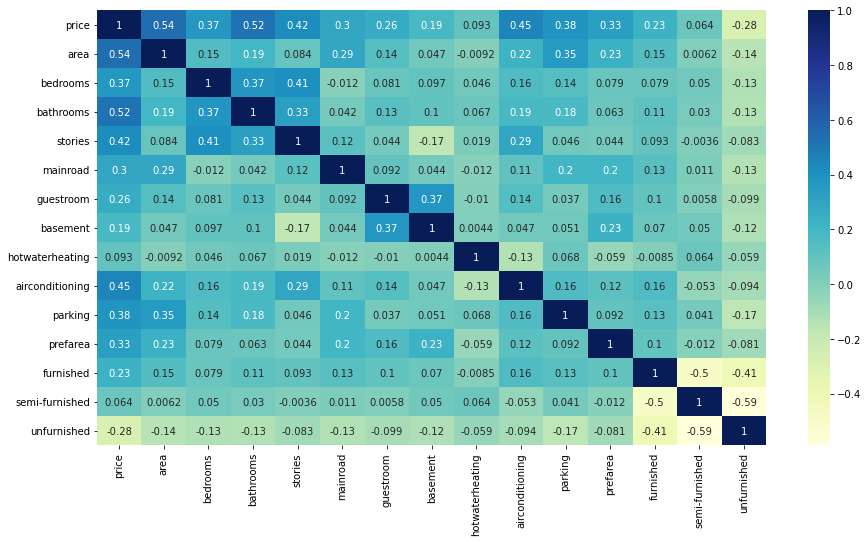

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(houseData.corr(), annot = True, cmap="YlGnBu")

In [16]:
correlations = houseData.corr()
print(correlations['price'])

price              1.000000
area               0.535997
bedrooms           0.366494
bathrooms          0.517545
stories            0.420712
mainroad           0.296898
guestroom          0.255517
basement           0.187057
hotwaterheating    0.093073
airconditioning    0.452954
parking            0.384394
prefarea           0.329777
furnished          0.229350
semi-furnished     0.063656
unfurnished       -0.280587
Name: price, dtype: float64


##### From here, we can see that the correlation between 'area' and 'price' is the highest

##### Then, we will start scaling/normalizing the numerical features (features originally with integer data type). We will also split the dataset into training and testing sets. These will be done at the beginning of model development process

#####

## (Model A) Regression Model Development (Single Linear Regression)

##### Firstly, we will start with simple linear regression model.

In [17]:
# 'area' as our feature and 'price' as our target variable
x_single = houseData['area'].values.reshape(-1,1)
y_single = houseData['price'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train_single, x_test_single, y_train_single, y_test_single = train_test_split(x_single, y_single, test_size=0.3, random_state=100)


In [18]:
from sklearn.linear_model import LinearRegression

regressor_single = LinearRegression()  
regressor_single.fit(x_train_single, y_train_single)


LinearRegression()

######

## (Model A) Model Evaluation (Single Linear Regression)

##### Here, we will evaluate our model by testing data using appropriate evaluation metrics, predicting the test set result and analyzing the accuracy of the predictions

In [19]:
# evaluate the model
print('Intercept:', regressor_single.intercept_)
print('Slope:', regressor_single.coef_)


Intercept: [2353148.37956561]
Slope: [[469.75690529]]


In [20]:
#predicting the testing set result
y_pred_single = regressor_single.predict(x_test_single)

#checking accuracy 
print("Train Score {:.2f}".format(regressor_single.score(x_train_single,y_train_single)))
print("Test Score {:.2f}".format(regressor_single.score(x_test_single, y_test_single)))

#compare actual output values with predicted values
singleLR = pd.DataFrame({'Actual': y_test_single.flatten(), 'Predicted': y_pred_single.flatten()})


Train Score 0.28
Test Score 0.30


In [21]:
singleLR

,Actual,Predicted
0,4403000,3.706048e+06
1,7350000,5.171690e+06
2,5250000,7.177082e+06
3,4550000,4.852255e+06
4,4382000,4.678445e+06
...,...,...
159,3430000,3.269174e+06
160,5040000,7.379547e+06
161,4130000,5.164643e+06
162,7525000,5.171690e+06


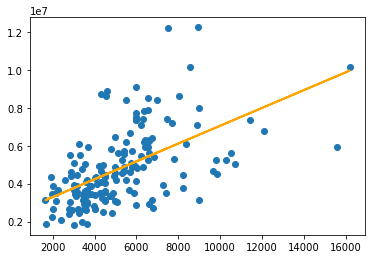

In [22]:
# checking the linear regression line
plt.scatter(x_test_single, y_test_single)
plt.plot(x_test_single, y_pred_single, color='orange', linewidth=2)
plt.show()


In [23]:
from sklearn import metrics

#mean absolute error
mae_sn = metrics.mean_absolute_error(y_test_single, y_pred_single)
print("MAE: ", mae_sn)
      
#mean squared error
mse_sn = metrics.mean_squared_error(y_test_single, y_pred_single)
print("MSE: ", mse_sn)
      
#root mean squared error
rmse_sn = np.sqrt(metrics.mean_squared_error(y_test_single, y_pred_single))
print("RMSE: ", rmse_sn)

MAE:  1244367.6725404474
MSE:  2767116536598.5312
RMSE:  1663465.2195337692


In [24]:
mean_price = np.mean(y_test_single)

# Compare the RMSE with the mean value of the target variable
if rmse_sn < mean_price:
    print("The model is accurate.")
else:
    print("The model is not accurate.")

The model is accurate.


##### Although the model seems to be accurate, let's develop a Multiple linear regression model to determine if the accuracy can be enhanced.

#####

## (Model B) Regression Model Development (Multiple Linear Regression)

In [25]:
from sklearn.model_selection import train_test_split

x = houseData.drop(['price'], axis=1)
y = houseData['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 100)

In [26]:
# scaling
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(int))
x_test = s_scaler.transform(x_test.astype(int))

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

#####

## (Model B) Model Evaluation (Multiple Linear Regression)

In [28]:
# evaluate the model
print('Intercept:', regressor.intercept_)
print('Slope:', regressor.coef_)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df

Intercept: 4756847.611548556
Slope: [ 491069.43547386   79425.28670882  522380.34539373  369255.45600005
  204755.04062743  132200.88382936  119099.16420859  218597.59243703
  353726.33219691  200316.72981772  290424.76664754   50942.98862851
   62468.00741606 -113365.66525433]


,Coefficient
area,491069.435474
bedrooms,79425.286709
bathrooms,522380.345394
stories,369255.456000
mainroad,204755.040627
guestroom,132200.883829
basement,119099.164209
hotwaterheating,218597.592437
airconditioning,353726.332197
parking,200316.729818


In [29]:
y_pred = regressor.predict(x_test)

#checking accuracy of Polynomial Regression Model
print("Train Score {:.2f}".format(regressor.score(x_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(x_test, y_test)))


Train Score 0.68
Test Score 0.67


In [30]:
multiLR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
multiLR.head(10)

,Actual,Predicted
265,4403000,4.143699e+06
54,7350000,6.661197e+06
171,5250000,5.722054e+06
244,4550000,5.326517e+06
268,4382000,4.831443e+06
231,4690000,4.069360e+06
25,8540000,8.056958e+06
169,5250000,5.730070e+06
494,2730000,3.497756e+06
120,5950000,5.656737e+06


In [31]:
from sklearn import metrics

#mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
      
#mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
      
#root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

MAE:  835899.4685006225
MSE:  1283969782447.7498
RMSE:  1133123.9042786758


##### We have done developing the Multiple linear regression model. Next, we will compare both model to see which one is more accurate

#####

## Comparing Univariate and Multiple Linear Regression

In [32]:
print("Single Linear Regression: ")
print("MAE: ", mae_sn)
print("MSE: ", mse_sn)
print("RMSE: ", rmse_sn)
print("***************************************")

print("Multiple Linear Regression: ")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)  


Single Linear Regression: 
MAE:  1244367.6725404474
MSE:  2767116536598.5312
RMSE:  1663465.2195337692
***************************************
Multiple Linear Regression: 
MAE:  835899.4685006225
MSE:  1283969782447.7498
RMSE:  1133123.9042786758


In [33]:
if rmse_sn < rmse:
    print("The single linear regression model is more accurate.")
else:
    print("The Multiple linear regression model is more accurate.")  

The Multiple linear regression model is more accurate.


##### Hence, we can conclude that the Multiple linear regression model is more preferred due to the lower root mean squared error which will result in a higher accuracy for the house pricing prediction. Also, from the training and testing scores for both model we can determine that Multiple linear regression model is more accurate.